<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/ul/14_local_outlier_factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Algorytm K-średnich](#3)
5. [Wizualizacja klastrów](#4)




### <a name='0'></a> Import bibliotek

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

sns.set(font_scale=1.2)
np.random.seed(10)

In [2]:
data = make_blobs(n_samples=300, cluster_std=2.0, random_state=10)[0]
data[:5]

array([[  4.64616033,   5.03253239],
       [  1.81963552,  -5.03357756],
       [  0.89059085,   3.41070216],
       [  0.61174827,   2.26068253],
       [  6.01229431, -10.52657552]])

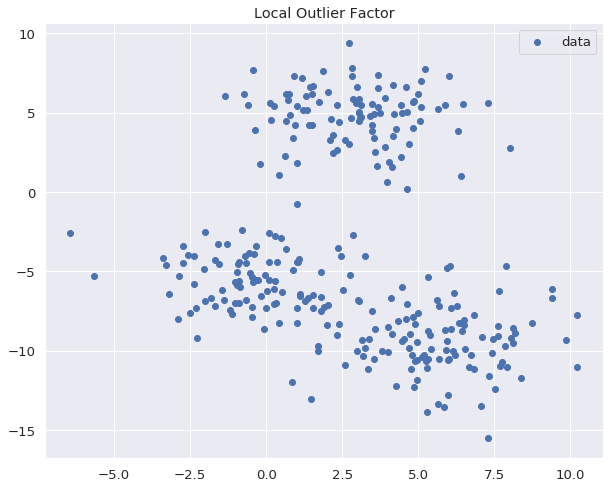

In [3]:
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], label='data', cmap='tab10')
plt.title('Local Outlier Factor')
plt.legend()
plt.show()

In [4]:
from sklearn.neighbors import LocalOutlierFactor 

lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(data)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
all_data = np.c_[data, y_pred]
all_data[:5]

array([[  4.64616033,   5.03253239,   1.        ],
       [  1.81963552,  -5.03357756,   1.        ],
       [  0.89059085,   3.41070216,   1.        ],
       [  0.61174827,   2.26068253,   1.        ],
       [  6.01229431, -10.52657552,   1.        ]])

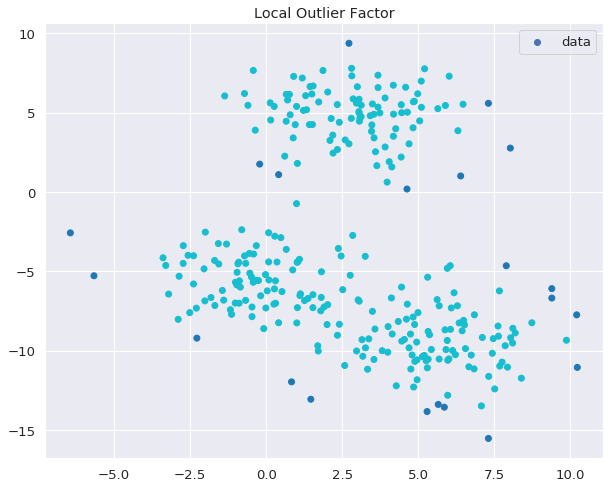

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(all_data[:, 0], all_data[:, 1], c=all_data[:, 2], cmap='tab10', label='data')
plt.title('Local Outlier Factor')
plt.legend()
plt.show()

In [7]:
LOF_scores = lof.negative_outlier_factor_
LOF_scores[:5]

array([-1.01190314, -1.15476989, -1.13850201, -1.34077683, -0.97573987])

In [8]:
radius = (LOF_scores.max() - LOF_scores) / (LOF_scores.max() - LOF_scores.min())
radius[:5]

array([0.03834082, 0.12830657, 0.1180624 , 0.24543848, 0.01556816])

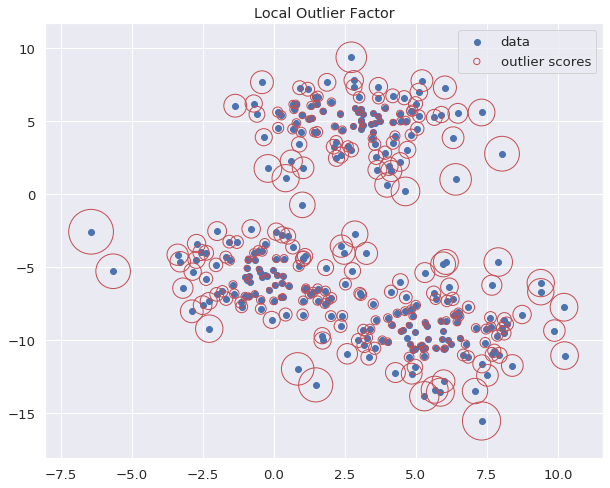

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(all_data[:, 0], all_data[:, 1], label='data', cmap='tab10')
plt.scatter(all_data[:, 0], all_data[:, 1], s=2000 * radius, edgecolors='r', facecolors='none', label='outlier scores')
plt.title('Local Outlier Factor')
legend = plt.legend()
legend.legendHandles[1]._sizes = [40]
plt.show()

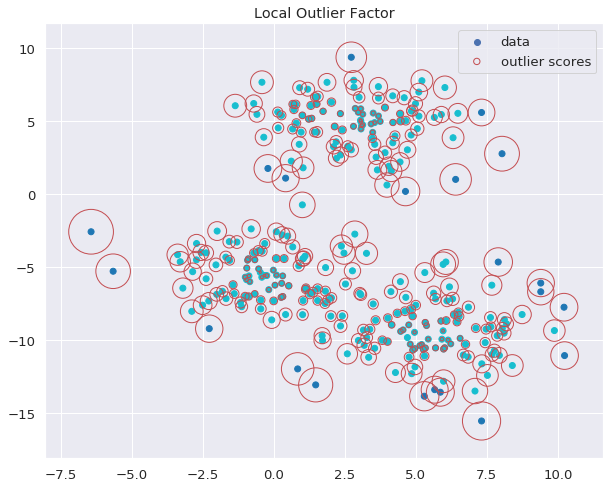

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(all_data[:, 0], all_data[:, 1], c=all_data[:, 2], cmap='tab10', label='data')
plt.scatter(all_data[:, 0], all_data[:, 1], s=2000 * radius, edgecolors='r', facecolors='none', label='outlier scores')
plt.title('Local Outlier Factor')
legend = plt.legend()
legend.legendHandles[1]._sizes = [40]
plt.show()

In [11]:
lof = LocalOutlierFactor(n_neighbors=20, novelty=True)
lof.fit(data)
y_pred = lof.predict(data)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

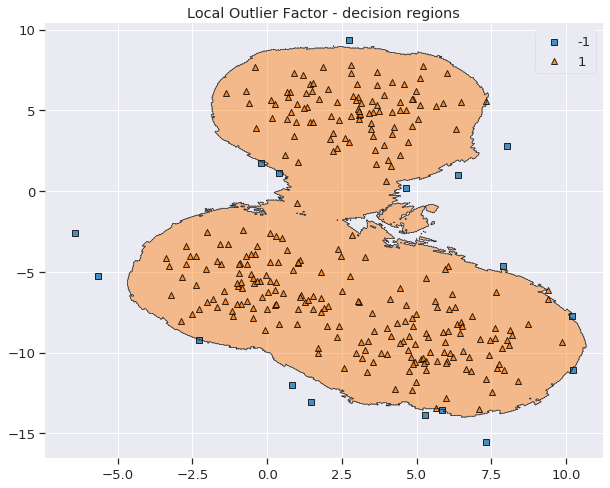

In [12]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(data, y_pred, lof)
plt.title('Local Outlier Factor - decision regions')
plt.show()